Machine Learning: Programming Exercise 1
Linear Regression
In this exercise, you will implement linear regression and get to see it work on data.

The goal of this script is to replicate the exercise 1 from Stanford Machine Learning course in Cousera in python. The course uses Matlab/Octave.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##### INSERT ONES FUNCTION #####
def insert_ones(x):
    """ Inserts a column of 'ones' into the dataframe, first row. The ones will multiply theta zero
    
    x : has to be a DataFrame or Series 
    
    """
    # inserts a column of ones to x
    return x.insert(0, 'ones', np.ones((x.shape[0],1)))


#### NORMALIZE THE DATA USING MEAN E STANDARD DEVIATION #####
def normalize(data):
    """ Input has to be pandas DataFrame or Series. Returns the normalized DataFrame or Series. """
    for j in range(data.shape[1]):
        mu = data[:,j].mean()
        sd = data[:,j].std()
        for i in range(data.shape[0]):
            # if data[i][i] == the mean and sd == 0, then it is a 0/0 division
            if (data[i][j] != mu) and (sd != 0):
                data[i][j] = ((data[i][j]-mu)/sd)
            else:
                continue
    return data

In [3]:
#import the data

df = pd.read_csv('ex1data2.txt', header = None)

# Split the data in X and Y

x = df[df.columns[0:(len(df.columns))-1]]
y = df[df.columns[-1:df.columns.size]]
x.insert(0, 'ones', np.ones((x.shape[0],1)))
X = pd.DataFrame.to_numpy(x)
Y = pd.DataFrame.to_numpy(y)

# Normalize X
X = normalize(X)

In [85]:
class linear_regression:

    def __init__(self):
        """ Init """
        # initializes a list to save the cost function values
        self.cost_history = []


    def fit(self, x, y, iter=1000, alpha=0.01):
        """ Fits x to y. Parameter has to be a DataFrame/Series/Np array """
        # initializes the parameters based on the number of features
        self.theta = np.random.rand(x.shape[1],1)
        
        # training the parameters - gradient descent
        for i in range(iter):
            # updating theta
            self.theta -= (alpha/x.shape[0])*((x.T).dot(((x.dot(self.theta))-y)))
            # Store the cost function computation in a list
            self.cost_history.append(self.cost_function(x, y, self.theta))
            
        return self.theta, self.cost_history


    def cost_function(self, x, y, theta):
        """  Compute cost - mean squared error - for linear regression with multiple variables """
        return (1/(2*x.shape[0]))*np.sum((x.dot(self.theta)-y)**2)
        

    def show_cost_plot(self):
        """ Simple plot of cost in every iteration after fit() """
        plt.plot(self.cost_history)
        
        
    def predict(self, x):
        """ 
        Returns an array of predicted values
        x : x has to be an numpy object that matches the shape of theta (based on the fit() method)
        """
        try:
            return x.dot(self.theta)
        except AttributeError:
            print("Error! Argument has to be a numpy object.")
        except ValueError:
            print("Error! Argument has to match the shape of the training parameter theta")

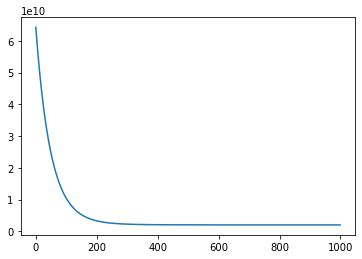

In [86]:
LR = linear_regression()
# input alpha as alpha, iterations as iter
theta, cost = LR.fit(X, Y)

LR.show_cost_plot()

In [87]:
# predict for 3.5 and 7
x_pred = np.array([1, 3.5, 7])

h = LR.predict([1, 3.5, 7])

Error! Argument has to be a numpy object.


In [88]:
h = LR.predict(x_pred)
print(h)

[679884.63929992]
